#**Data Preprocessing**


In [4]:
#step 1: importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

####Reading Data

In [29]:
#step 2 Reading Data
df1=pd.read_csv('422 datasets/madrid_2001.csv')
df2=pd.read_csv('422 datasets/madrid_2002.csv')
df3=pd.read_csv('422 datasets/madrid_2003.csv')
df4=pd.read_csv('422 datasets/madrid_2004.csv')
df5=pd.read_csv('422 datasets/madrid_2005.csv')
df6=pd.read_csv('422 datasets/madrid_2006.csv')
df7=pd.read_csv('422 datasets/madrid_2007.csv')
df8=pd.read_csv('422 datasets/madrid_2008.csv')
df9=pd.read_csv('422 datasets/madrid_2009.csv')
df10=pd.read_csv('422 datasets/madrid_2010.csv')
df11=pd.read_csv('422 datasets/madrid_2011.csv')
df12=pd.read_csv('422 datasets/madrid_2012.csv')
df13=pd.read_csv('422 datasets/madrid_2013.csv')
df14=pd.read_csv('422 datasets/madrid_2014.csv')
df15=pd.read_csv('422 datasets/madrid_2015.csv')
df16=pd.read_csv('422 datasets/madrid_2016.csv')
df17=pd.read_csv('422 datasets/madrid_2017.csv')
df18=pd.read_csv('422 datasets/madrid_2018.csv')

df=pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9, df10, df11,df12,df13,df14,df15,df16, df17,df18], axis=0)
df = df.reset_index(drop=True)
df_init=df.copy()

In [6]:
print('Features:')
for i,j in enumerate(df.columns):
  print(i+1,'->',j)

Features:
1 -> date
2 -> BEN
3 -> CO
4 -> EBE
5 -> MXY
6 -> NMHC
7 -> NO_2
8 -> NOx
9 -> OXY
10 -> O_3
11 -> PM10
12 -> PXY
13 -> SO_2
14 -> TCH
15 -> TOL
16 -> station
17 -> PM25
18 -> NO
19 -> CH4


####First Five Value


In [7]:
df.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
1,2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


####Last Five Values

In [8]:
df.tail()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,NaN,0.5,NaN,NaN,NaN,91.0,192.0,NaN,1.0,35.0,NaN,NaN,NaN,NaN,28079056,22.0,66.0,NaN
3808220,2018-02-01 00:00:00,NaN,0.7,NaN,NaN,NaN,107.0,241.0,NaN,NaN,29.0,NaN,15.0,NaN,NaN,28079057,NaN,87.0,NaN
3808221,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,48.0,91.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058,NaN,28.0,NaN
3808222,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,103.0,320.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079059,NaN,141.0,NaN
3808223,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,96.0,202.0,NaN,3.0,26.0,NaN,NaN,NaN,NaN,28079060,NaN,69.0,NaN


####Description Of Dataset

In [9]:
#shape
print('Shape:(row,col)')
print(df.shape)
print('***'*10)
#information of the datas
print('Information:')
print(df.info())
print('***'*10)


Shape:(row,col)
(3808224, 19)
******************************
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 19 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   MXY      float64
 5   NMHC     float64
 6   NO_2     float64
 7   NOx      float64
 8   OXY      float64
 9   O_3      float64
 10  PM10     float64
 11  PXY      float64
 12  SO_2     float64
 13  TCH      float64
 14  TOL      float64
 15  station  int64  
 16  PM25     float64
 17  NO       float64
 18  CH4      float64
dtypes: float64(17), int64(1), object(1)
memory usage: 552.0+ MB
None
******************************


#Visualizing Data

####Dsecription of the Data

In [10]:
#descriptive statistics (numerical)
print(df.describe().T)

             count          mean         std          min          25%  \
BEN      1041684.0  1.257431e+00    1.910831         0.00         0.21   
CO       2651012.0  5.503838e-01    0.535448         0.00         0.26   
EBE      1001724.0  1.407927e+00    2.146109         0.00         0.35   
MXY       315415.0  4.650394e+00    5.599223         0.00         1.20   
NMHC     1085312.0  1.873865e-01    0.153953         0.00         0.09   
NO_2     3787050.0  5.047151e+01   34.552876         0.00        24.00   
NOx      2376275.0  1.093188e+02  110.287083         0.00        40.00   
OXY       315695.0  2.280912e+00    2.639609         0.00         0.96   
O_3      2991732.0  3.982616e+01   30.392489         0.00        12.71   
PM10     2861255.0  2.893654e+01   25.948586         0.00        11.50   
PXY       315584.0  2.056178e+00    2.395130         0.00         0.80   
SO_2     2775960.0  1.065539e+01    9.121267         0.00         5.84   
TCH      1086441.0  1.435882e+00    0.

###Histogram to understand the distribution

                       date
count               3808224
unique               151896
top     2003-07-21 13:00:00
freq                     28


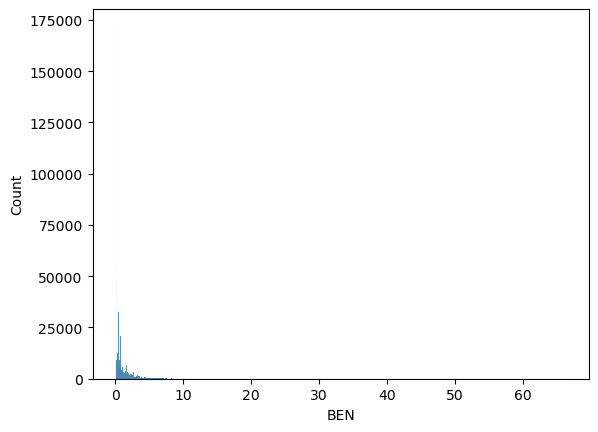

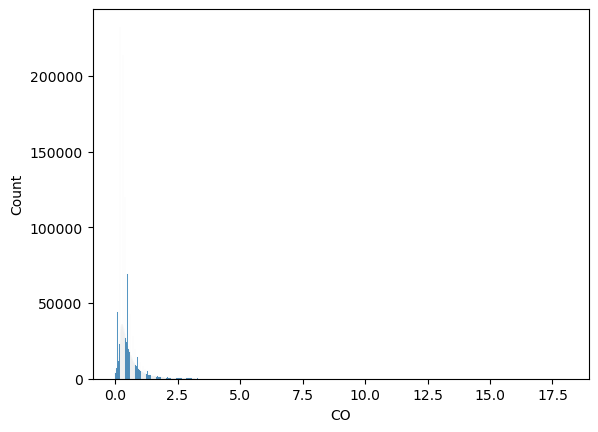

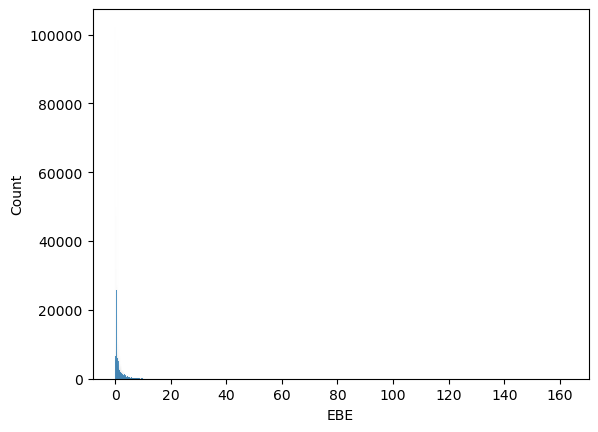

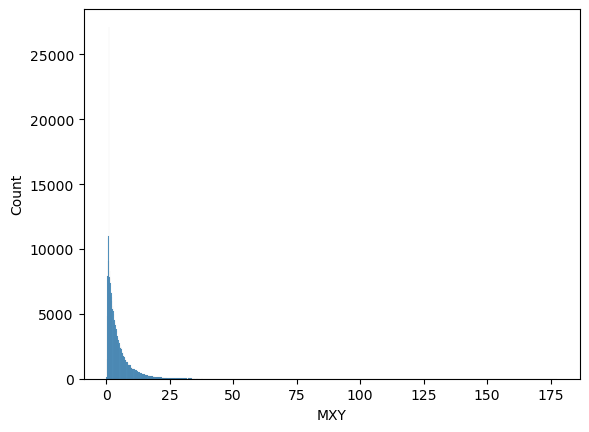

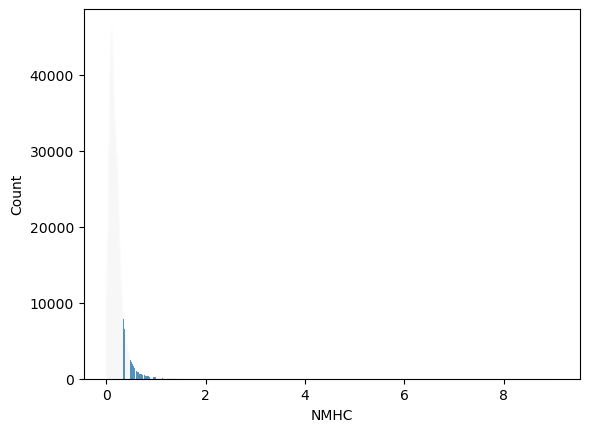

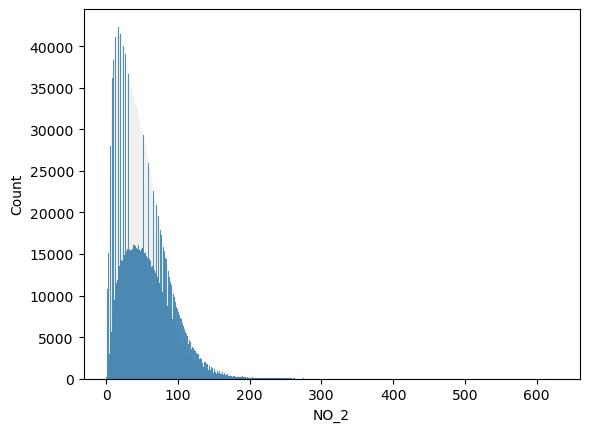

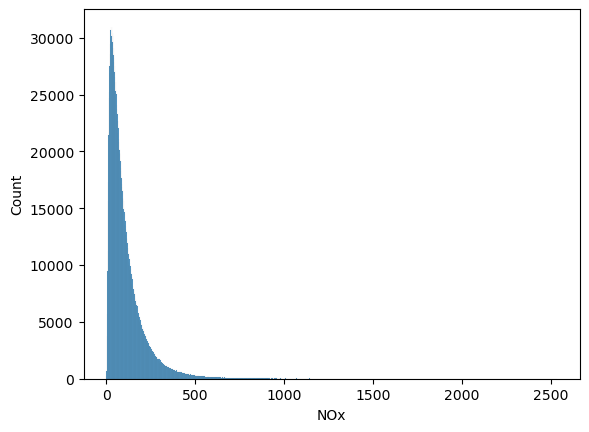

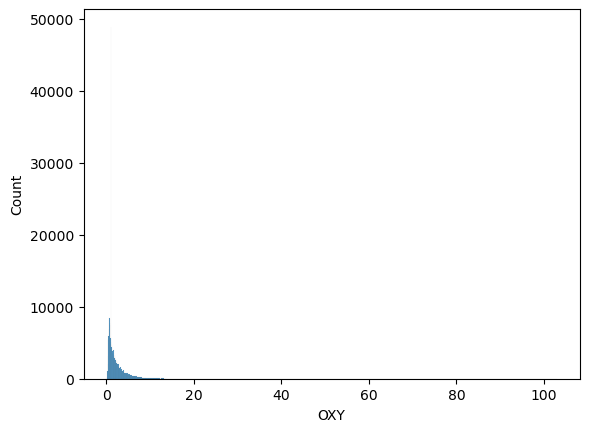

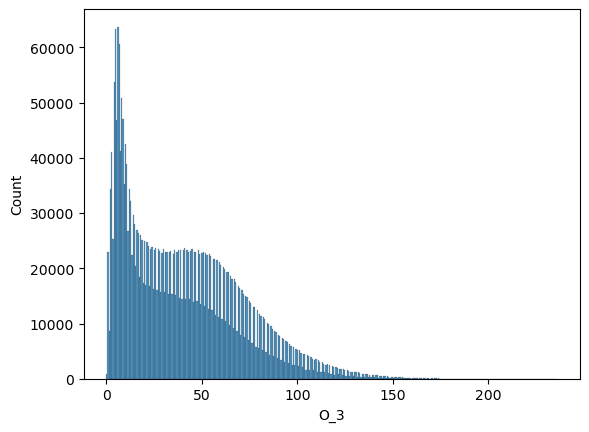

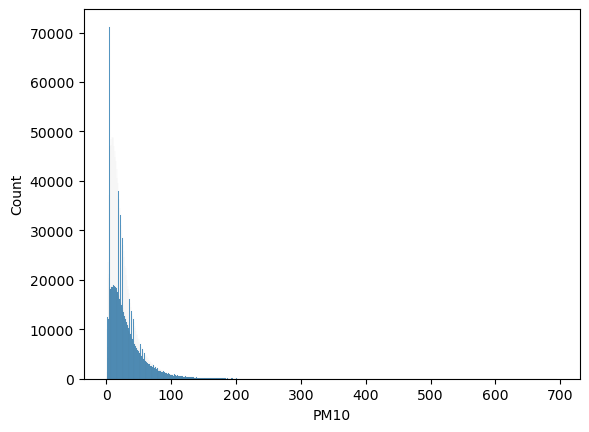

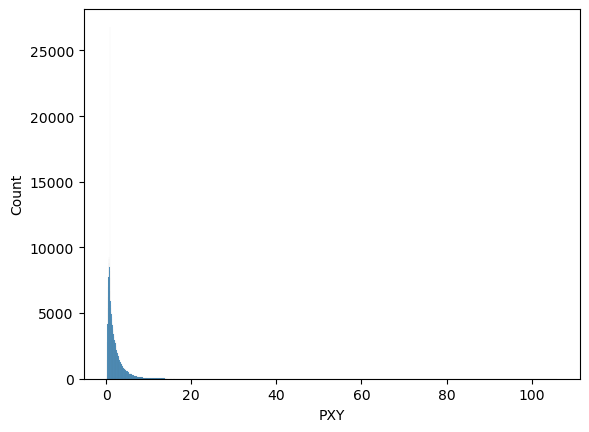

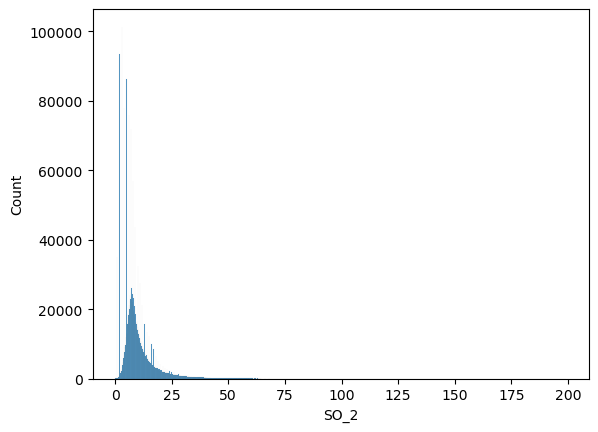

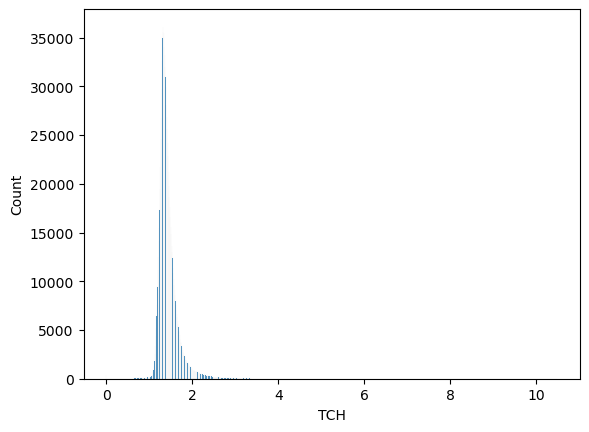

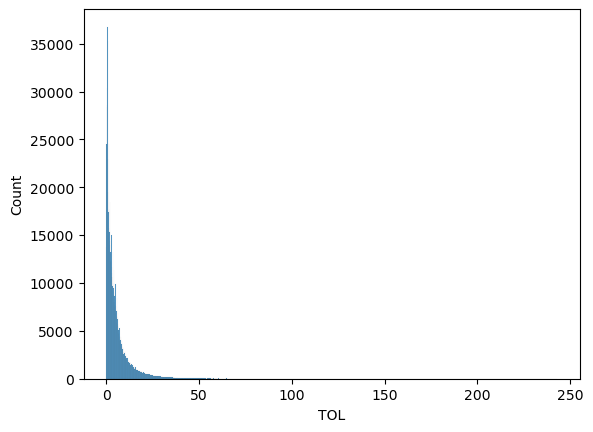

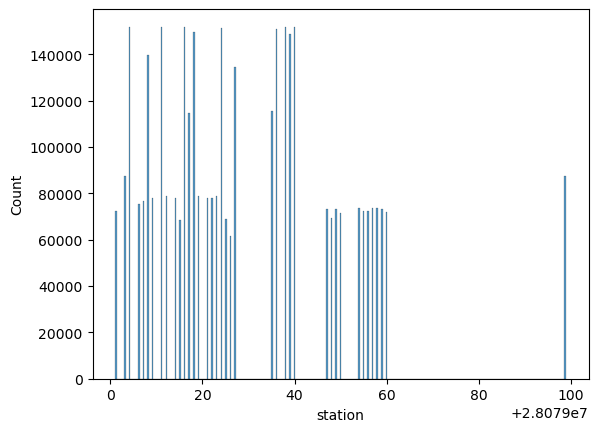

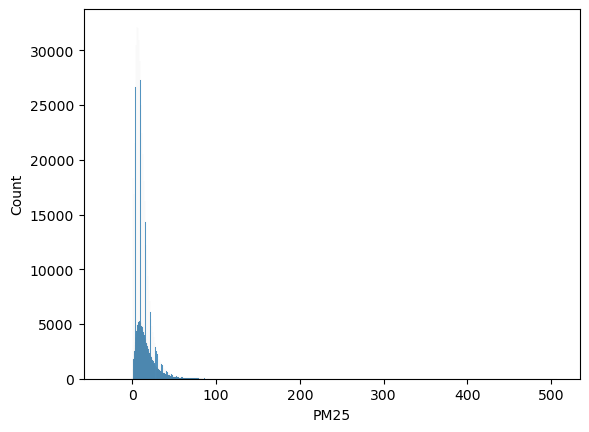

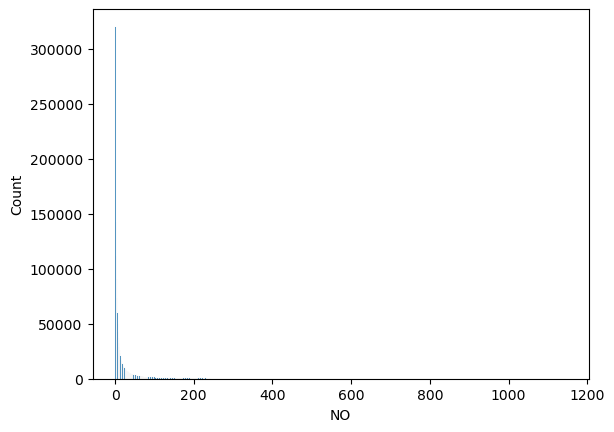

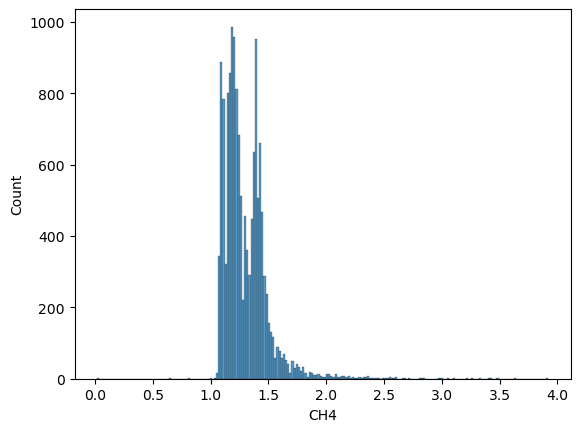

In [11]:
#step 4 exploratory Data Analysis (EDA)

#object value
print(df.describe(include='object'))
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

####KDE Plot for better understaning of Distribution

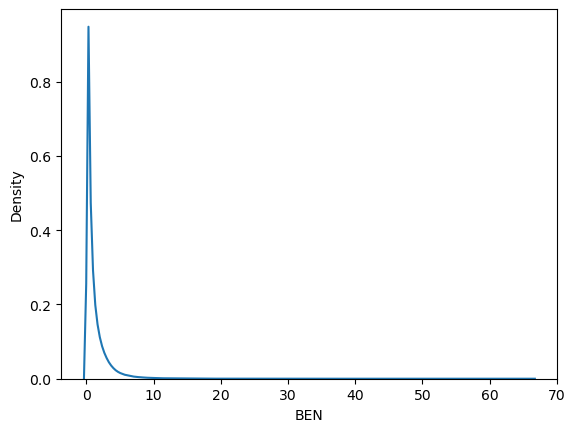

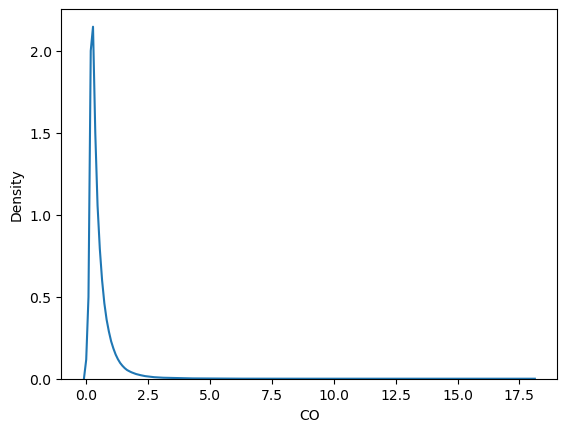

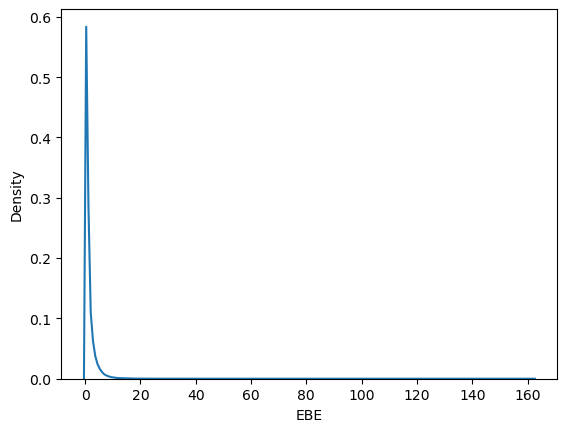

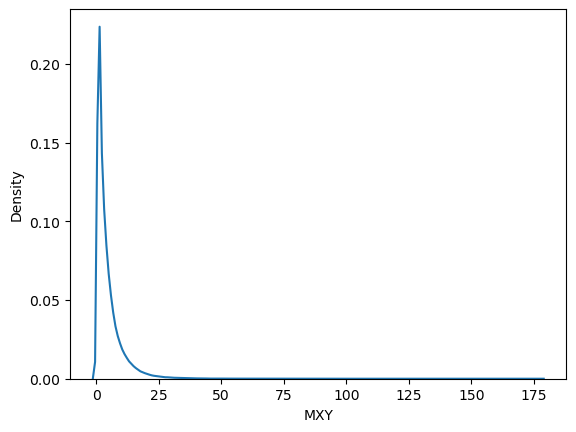

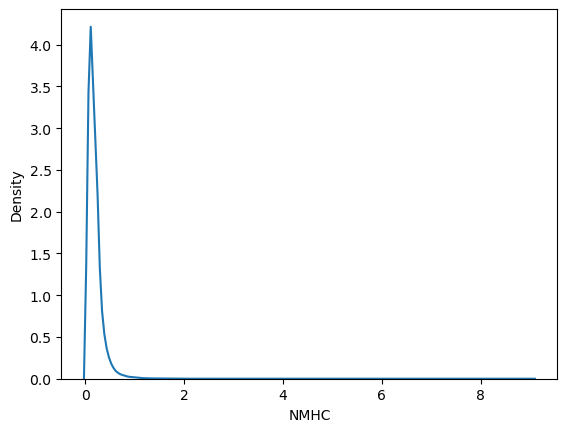

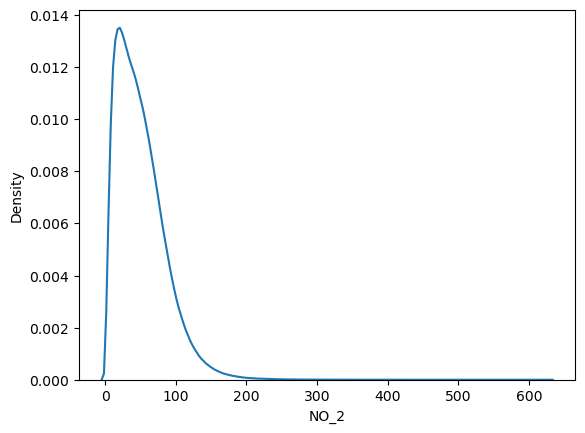

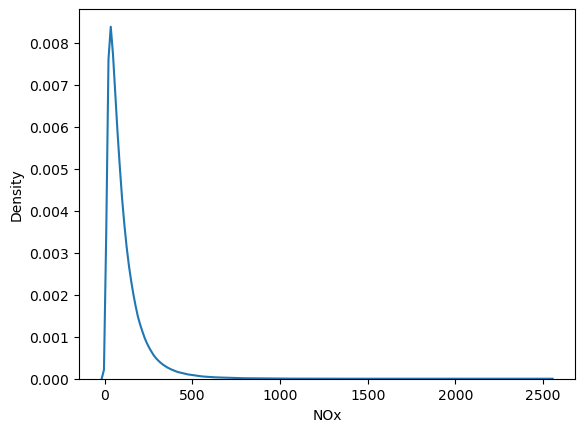

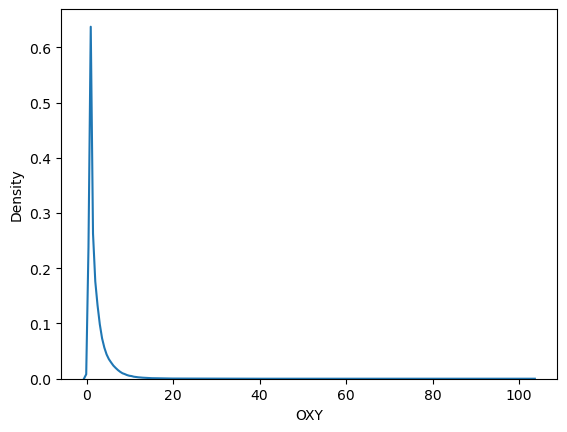

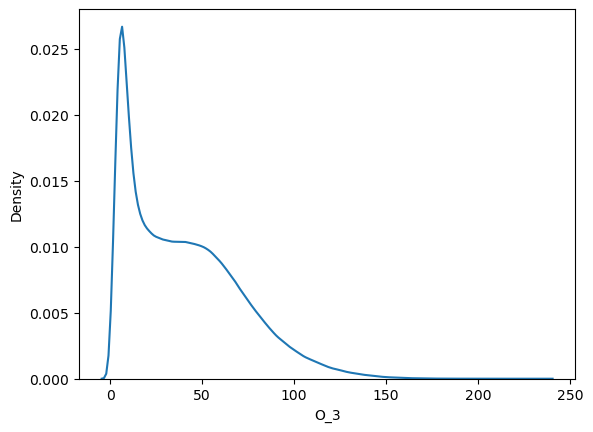

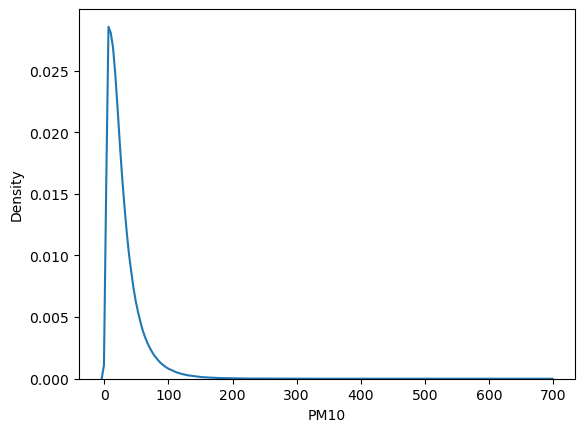

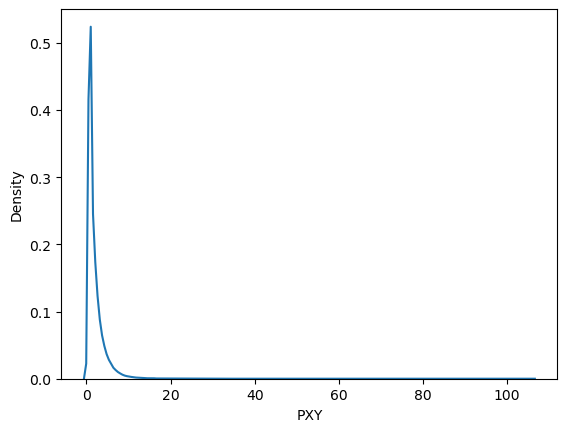

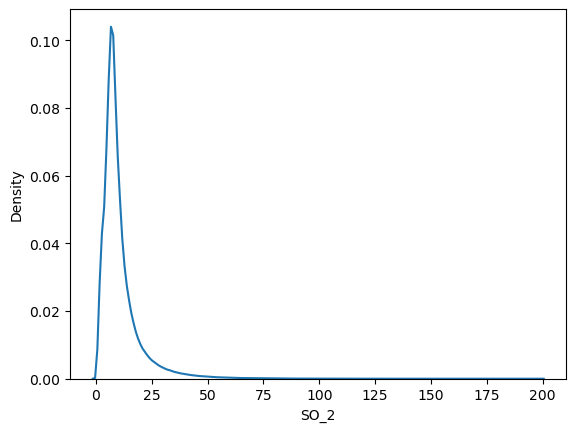

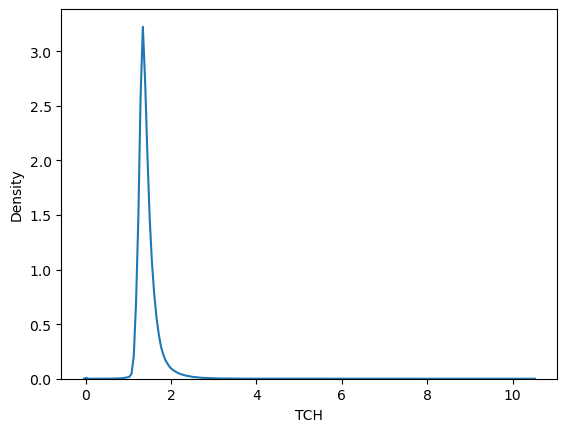

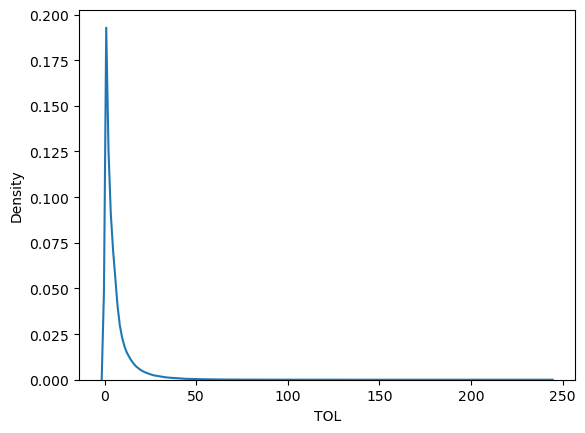

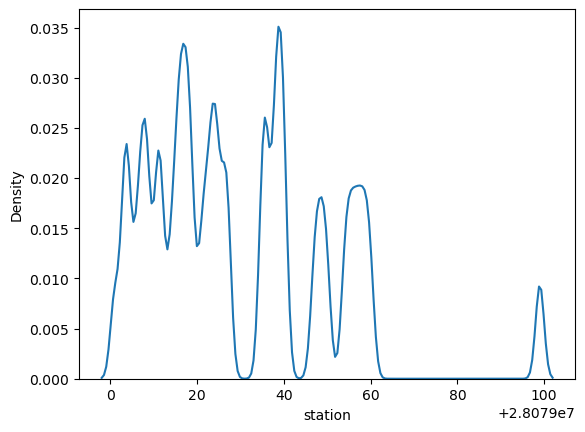

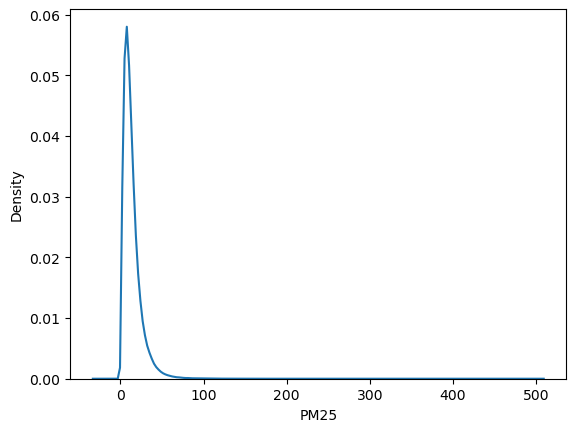

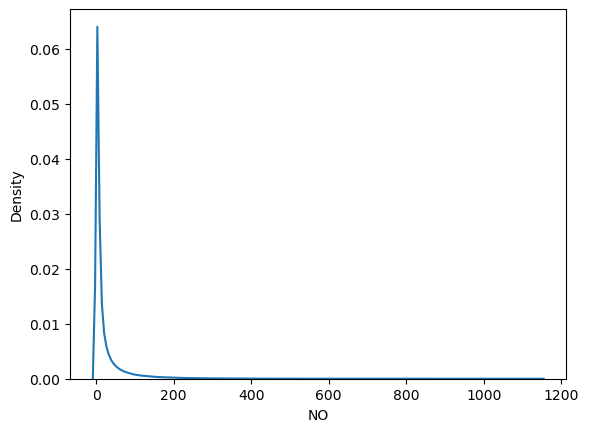

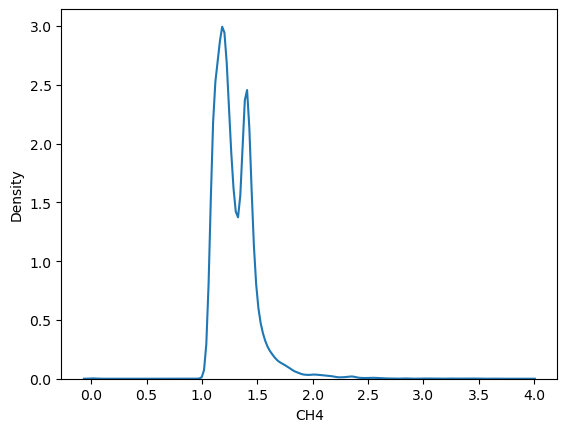

In [12]:
for i in df.select_dtypes(include=['number', 'datetime']).columns:
  sns.kdeplot(data=df, x=i)
  plt.show()

####Scatter plot to understanf the relationship

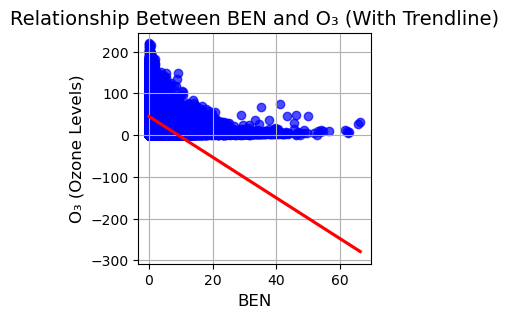

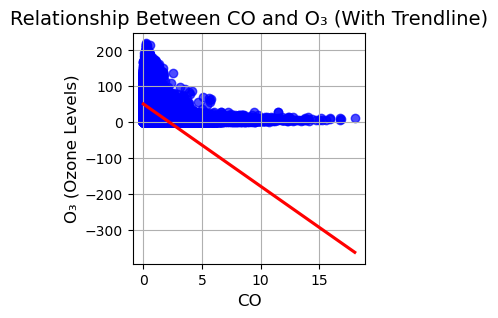

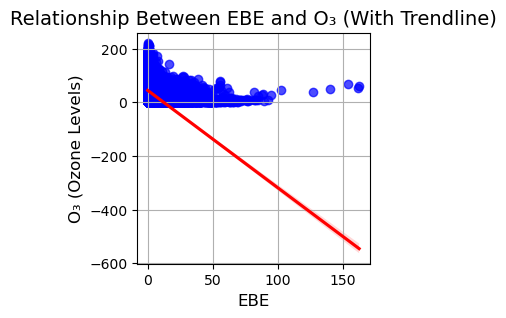

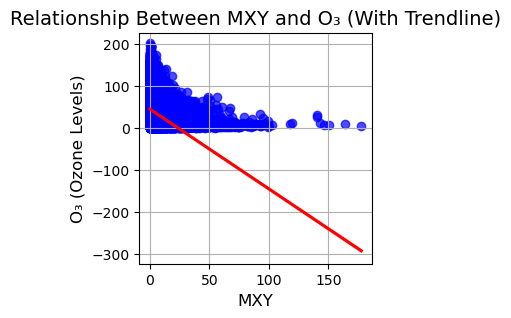

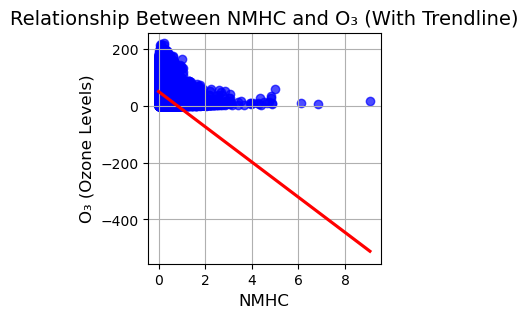

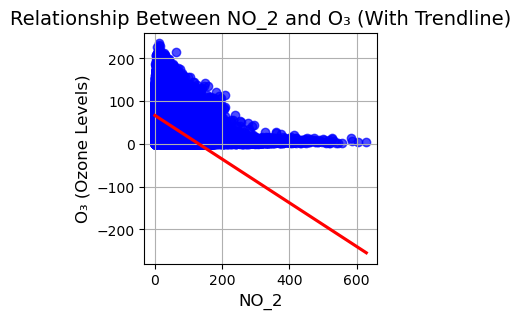

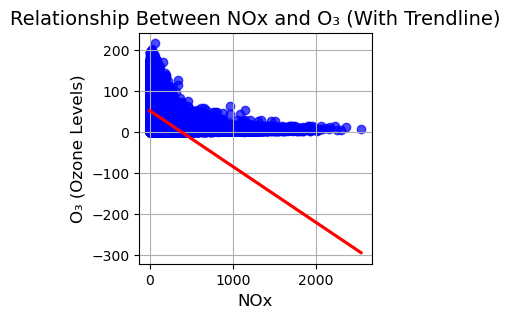

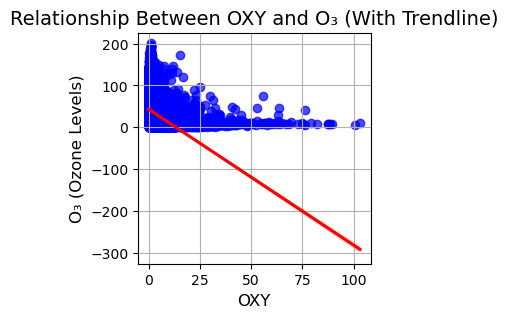

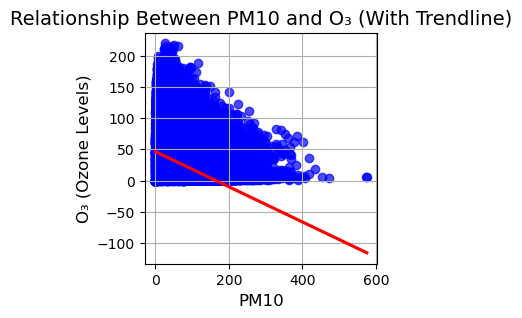

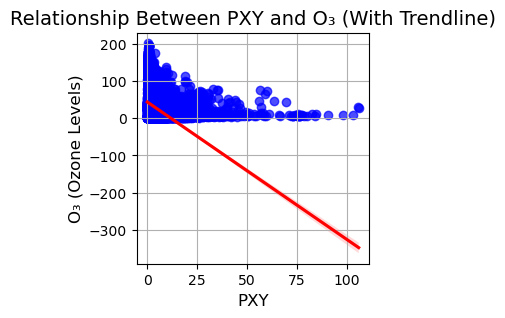

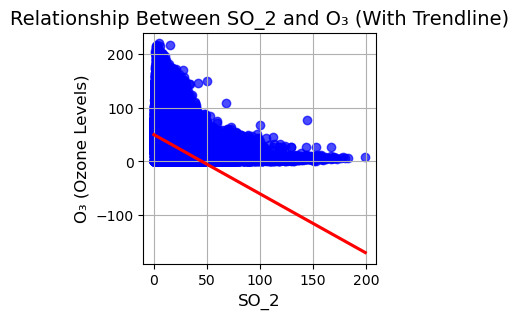

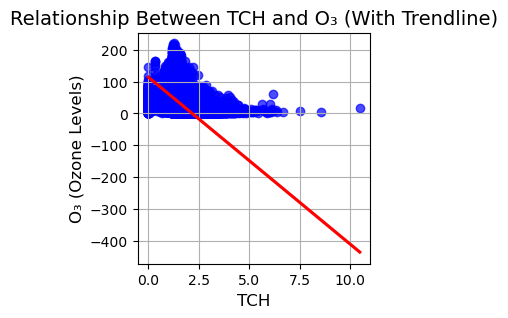

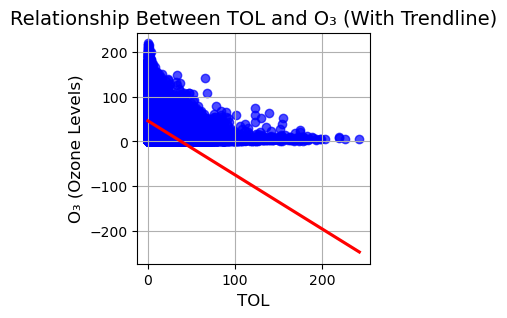

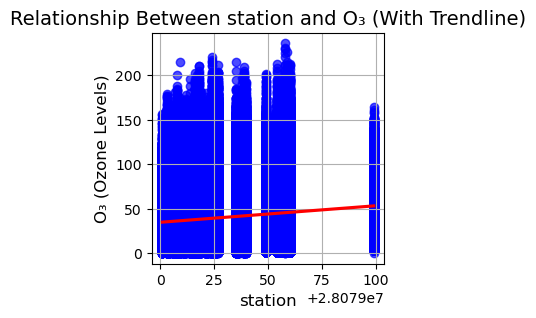

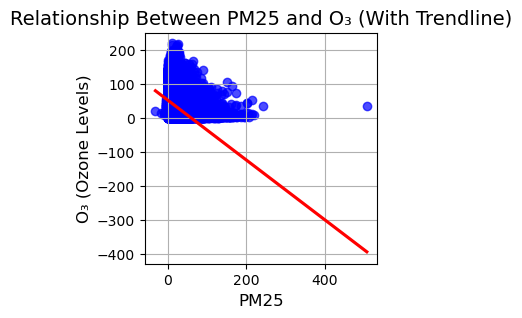

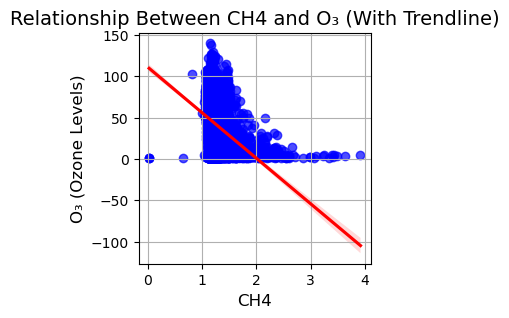

In [13]:
# # #scatter plot understand the relationship
## List of features to analyze


features = ['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY',
       'PM10', 'PXY', 'SO_2', 'TCH', 'TOL', 'station','PM25','CH4']

for feature in features:
        plt.figure(figsize=(3, 3))
        sns.regplot(
            data=df,
            x=feature,
            y='O_3',
            scatter_kws={'alpha': 0.7, 'color': 'blue'},
            line_kws={'color': 'red'}
        )
        plt.title(f'Relationship Between {feature} and O₃ (With Trendline)', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('O₃ (Ozone Levels)', fontsize=12)
        plt.grid(True)
        plt.show()


####Correlation with heatmap to intrepret the relation and multicollinarity

<Axes: >

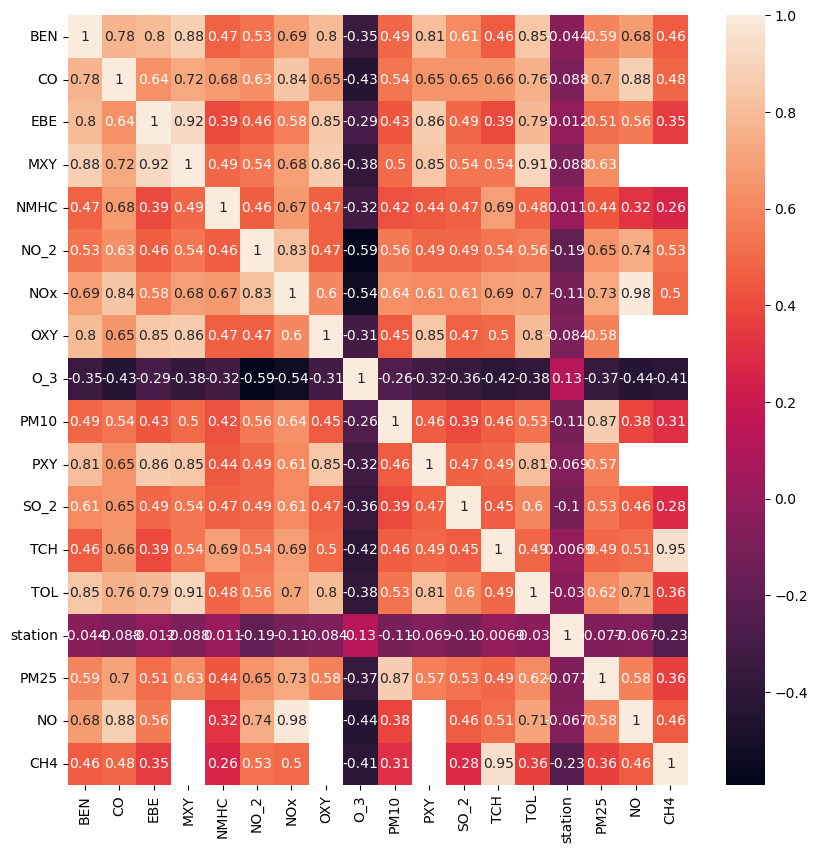

In [14]:
# correlation with heatmap to intrepret the relation and multicollinarity
df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)


###Finding the outliers of the dataset using BoxPlot

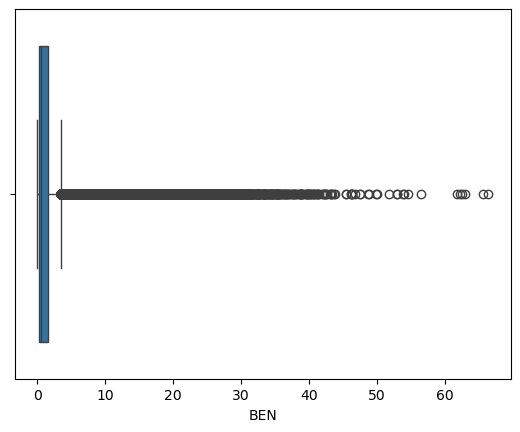

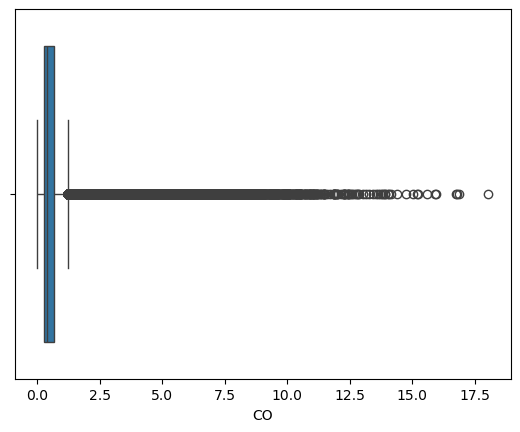

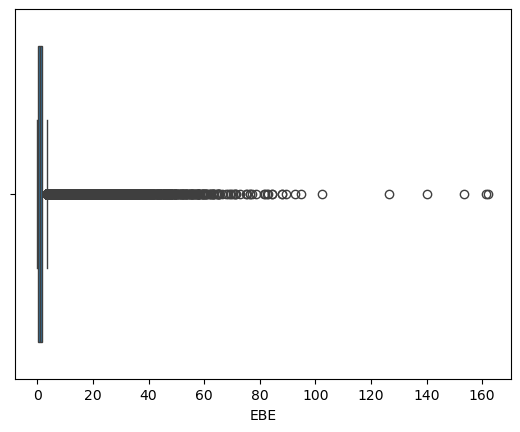

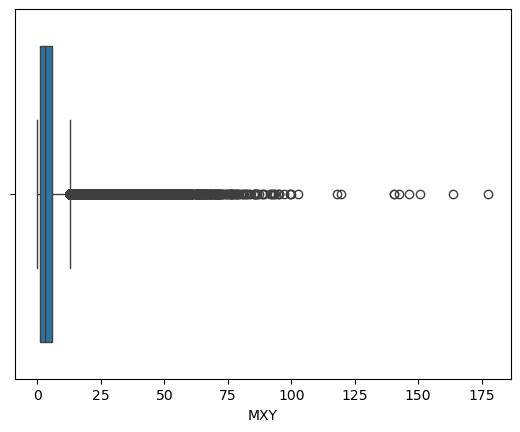

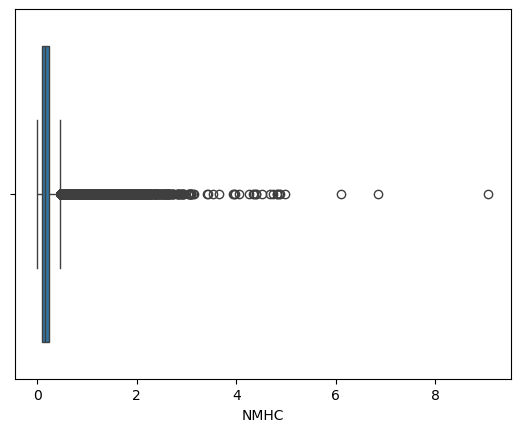

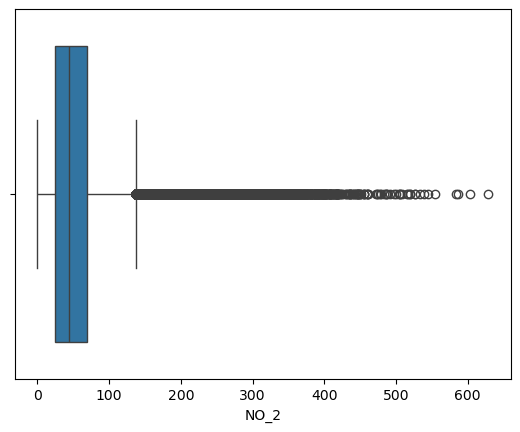

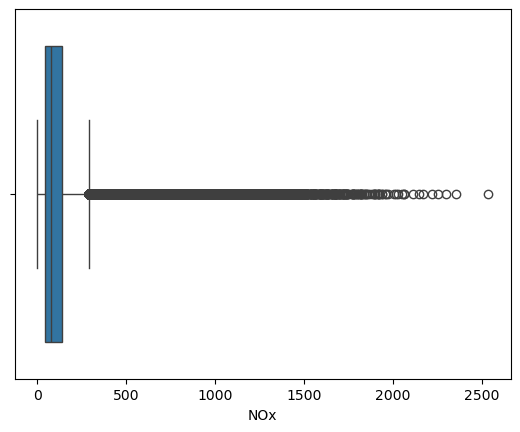

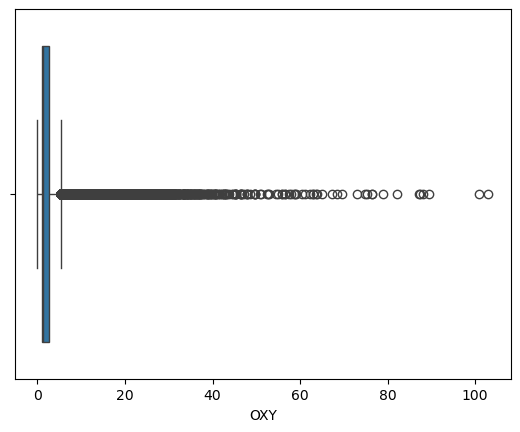

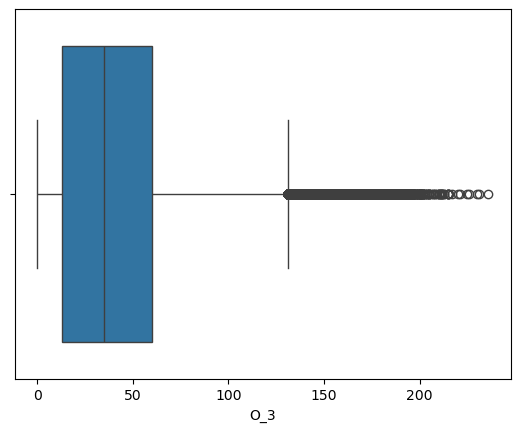

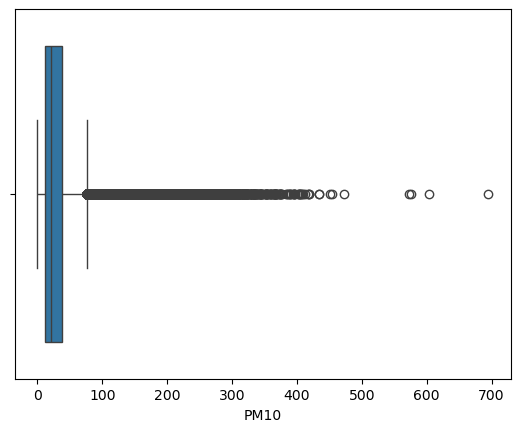

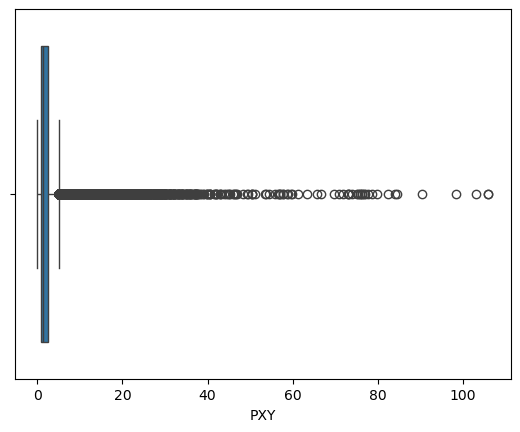

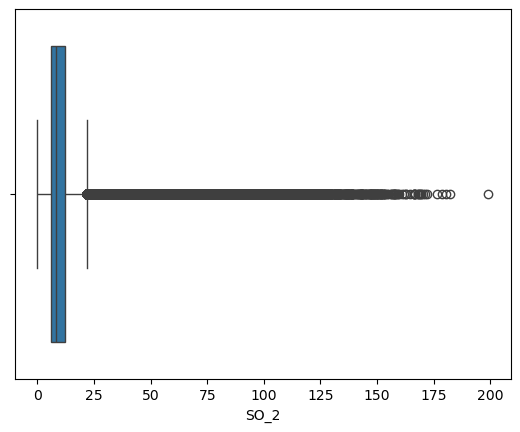

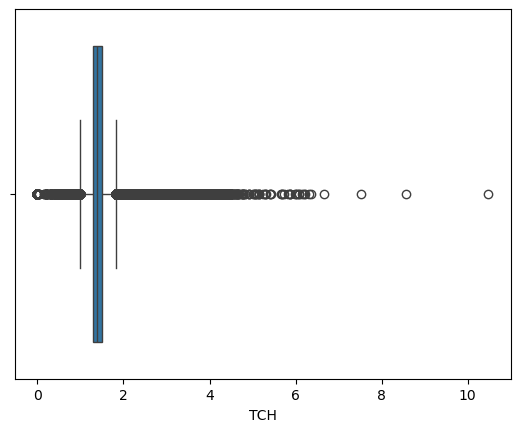

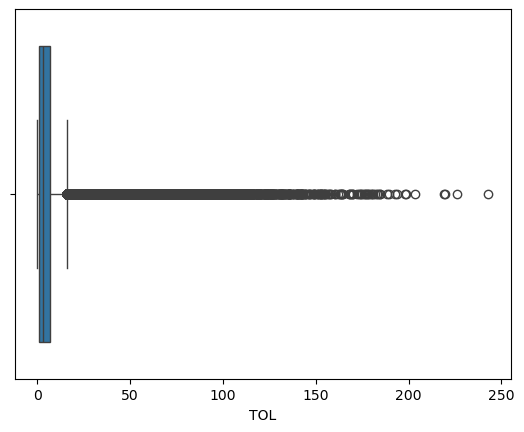

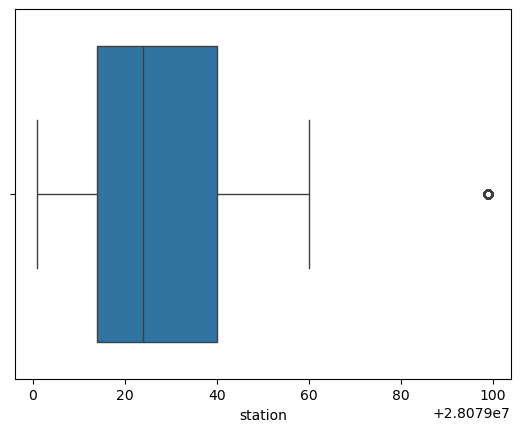

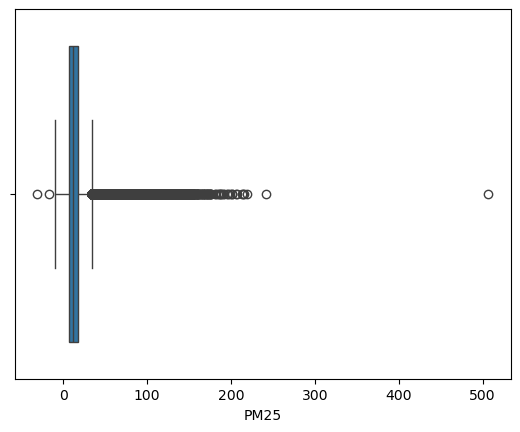

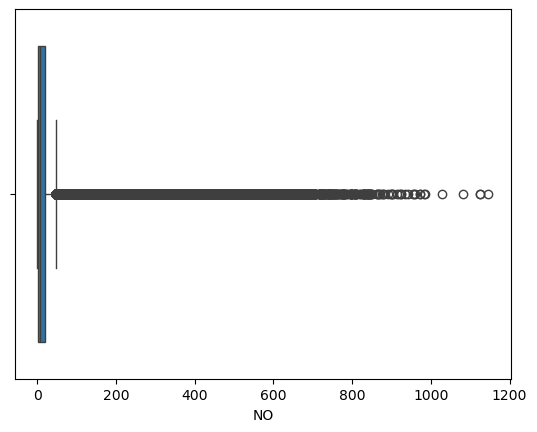

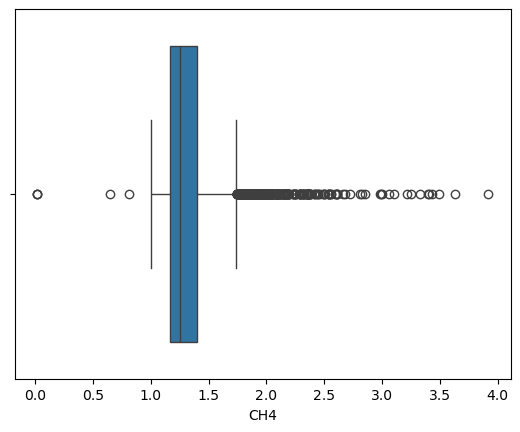

In [15]:
#box plot to understand the outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

#Data Cleaning

In [16]:
#finding missing value
print('Missing Value:')
print(df.isnull().sum())
print('***'*10)
#finding percantage of missing value
print('Percentage of Missing Value:')
print(df.isnull().sum()/df.shape[0]*100)
print('***'*10)
#finding duplicates
print('Duplicates:')
print(df.duplicated().sum())
print('***'*10)
#idenfying garbage value
print('Garbage Value:')
for i in df.select_dtypes(include='object').columns: #cz garbage are in object type value
   print(df[i].value_counts())
   print('***'*10)
# no garbage value as it would show in the last and show the character and the count also


Missing Value:
date             0
BEN        2766540
CO         1157212
EBE        2806500
MXY        3492809
NMHC       2722912
NO_2         21174
NOx        1431949
OXY        3492529
O_3         816492
PM10        946969
PXY        3492640
SO_2       1032264
TCH        2721783
TOL        2769295
station          0
PM25       2991800
NO         2275827
CH4        3793374
dtype: int64
******************************
Percentage of Missing Value:
date        0.000000
BEN        72.646462
CO         30.387183
EBE        73.695770
MXY        91.717530
NMHC       71.500836
NO_2        0.556007
NOx        37.601491
OXY        91.710178
O_3        21.440230
PM10       24.866421
PXY        91.713093
SO_2       27.106179
TCH        71.471190
TOL        72.718805
station     0.000000
PM25       78.561555
NO         59.760849
CH4        99.610054
dtype: float64
******************************
Duplicates:
0
******************************
Garbage Value:
2003-07-21 13:00:00    28
2003-06-15 03:00:00 

###dropping these features since the missing values percentage is greater than 50% and there are no duplicate value and Garbage values in the dataset


In [30]:
df=df.drop(['BEN', 'EBE','MXY', 'NMHC','TCH','OXY','PXY','TOL','station','date','PM25','CH4','NOx','NO'], axis = 1)
df.head()
#[Dropping station as it is irrelevant for our analysis]

,CO,NO_2,O_3,PM10,SO_2
0,0.37,58.400002,34.529999,105.000000,6.34
1,0.34,56.250000,42.160000,100.599998,8.11
2,0.28,50.660000,46.310001,100.099998,7.85
3,0.47,69.790001,40.650002,69.779999,6.46
4,0.39,22.830000,66.309998,75.180000,8.80


###Cleaning datas where target value (O_3) is Null

In [31]:
df= df.dropna(subset=['O_3'])
print('New Shape after dropping null rows of target value:')
df.shape

New Shape after dropping null rows of target value:


(2991732, 5)

###Imputing other NULL values using KNNI Imputer


In [33]:
df['CO'].fillna(df['CO'].mean(), inplace = True)
df['NO_2'].fillna(df['NO_2'].mean(), inplace = True)
df['PM10'].fillna(df['PM10'].mean(), inplace = True)
df['SO_2'].fillna(df['SO_2'].mean(), inplace = True)

In [34]:
print('Result After imputing:\n',df.isnull().sum())

Result After imputing:
 CO      0
NO_2    0
O_3     0
PM10    0
SO_2    0
dtype: int64


### Caluculating wisker to treat outliers

In [35]:
#Outlier treatment
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  return lower_bound,upper_bound


df.columns

Index(['CO', 'NO_2', 'O_3', 'PM10', 'SO_2'], dtype='object')

###Treating those values which have outliers

In [36]:
for i in ['CO','NO_2','PM10','SO_2']:
  lw,uk=wisker(df[i])
  df[i]=np.where(df[i]>uk,uk,df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])

###Checking if outliers are fixed or not

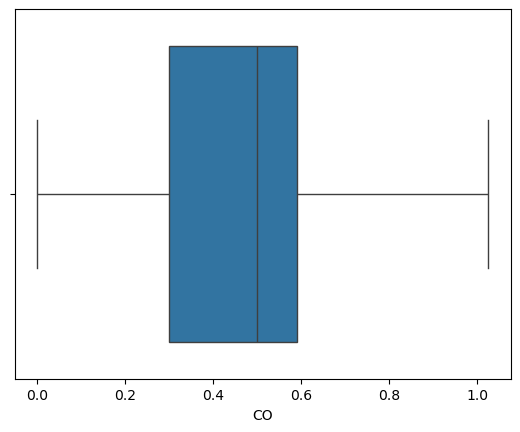

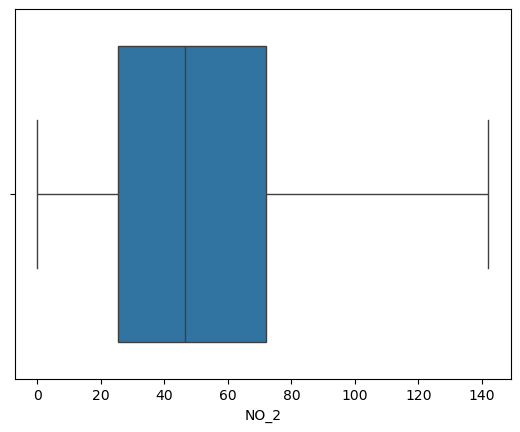

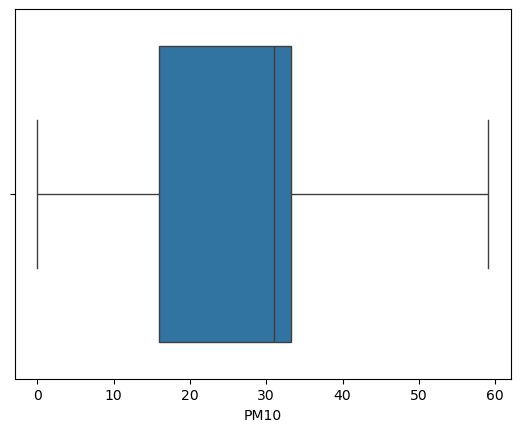

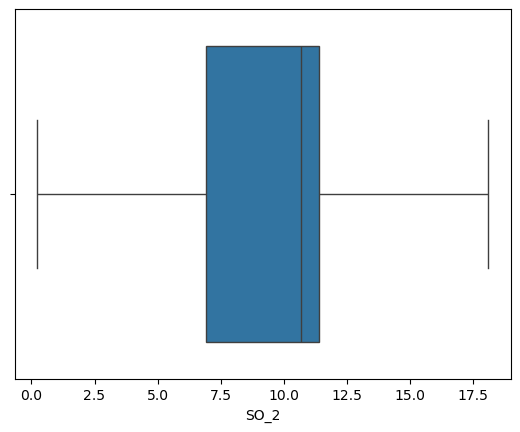

In [37]:
for i in ['CO','NO_2','PM10','SO_2']:
  sns.boxplot(data=df,x=i)
  plt.show()

####Data Before Cleaning Vs Data After Cleaning

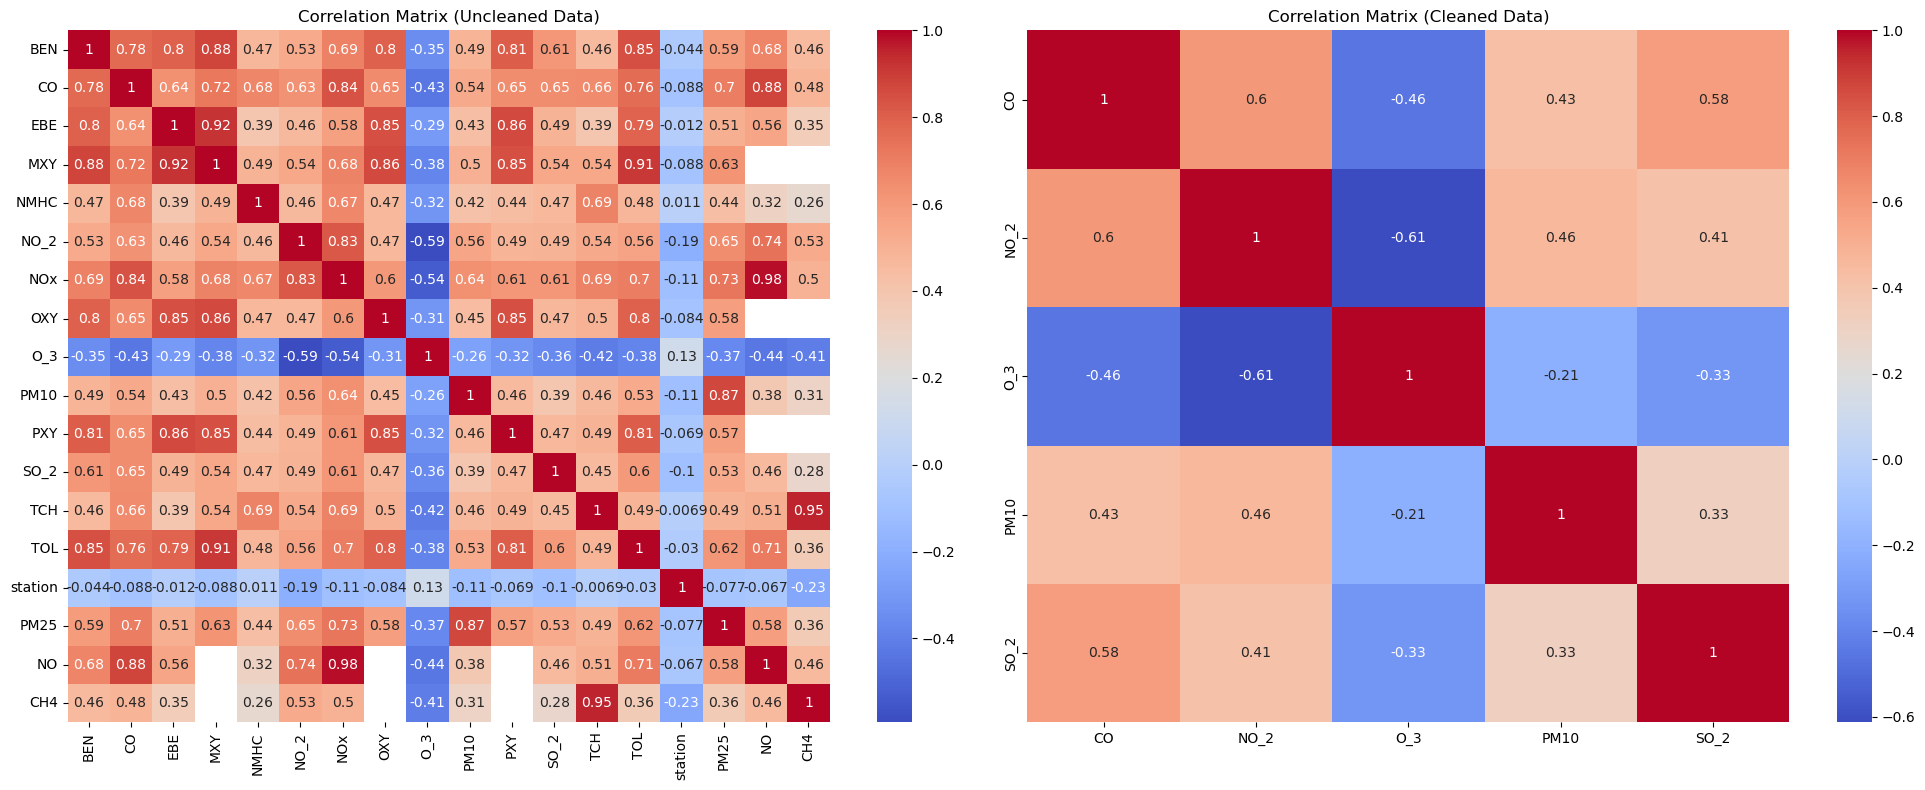

In [38]:

# Calculate correlation for uncleaned data
corr_uncleaned = df_init.select_dtypes(include='number').corr()

# Calculate correlation for cleaned data
corr_cleaned = df.select_dtypes(include='number').corr()

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for uncleaned data
sns.heatmap(corr_uncleaned, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix (Uncleaned Data)')

# Heatmap for cleaned data
sns.heatmap(corr_cleaned, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix (Cleaned Data)')

plt.tight_layout()
plt.show()

###Scalling the Data

In [39]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
print('Data Before Scalling:')
print(df.head())
print('Data After Scaling:')
print(df_scaled.head())

Data Before Scalling:
     CO       NO_2        O_3       PM10  SO_2
0  0.37  58.400002  34.529999  59.100004  6.34
1  0.34  56.250000  42.160000  59.100004  8.11
2  0.28  50.660000  46.310001  59.100004  7.85
3  0.47  69.790001  40.650002  59.100004  6.46
4  0.39  22.830000  66.309998  59.100004  8.80
Data After Scaling:
         CO      NO_2       O_3  PM10      SO_2
0  0.360976  0.411253  0.146314   1.0  0.341443
1  0.331707  0.396113  0.178644   1.0  0.440436
2  0.273171  0.356748  0.196229   1.0  0.425895
3  0.458537  0.491462  0.172246   1.0  0.348154
4  0.380488  0.160769  0.280975   1.0  0.479027


###Splitting Datset

In [40]:
x=df_scaled.drop('O_3',axis=1)
y=df_scaled['O_3']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
df_scaled.tail()

,CO,NO_2,O_3,PM10,SO_2
2991727,0.554787,1.000000,0.008475,0.525141,0.623068
2991728,0.487805,0.640823,0.004237,0.592217,0.623068
2991729,0.554787,0.338016,0.008475,0.525141,0.623068
2991730,0.554787,0.725327,0.008475,0.525141,0.623068
2991731,0.554787,0.676033,0.012712,0.439932,0.623068


#Model Train

### 1. Linear Regression

In [41]:

x=df_scaled.drop('O_3',axis=1)
y=df_scaled['O_3']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [42]:
y_predict=model1.predict(x_test)

                        MSE      RMSE       MAE        R2  \
 Linear Regression  0.00988  0.099399  0.076899  0.401882   

                    Explained Variance Score:  
 Linear Regression                   0.401883  
-0.017828918356738617


<Axes: xlabel='O_3', ylabel='Density'>

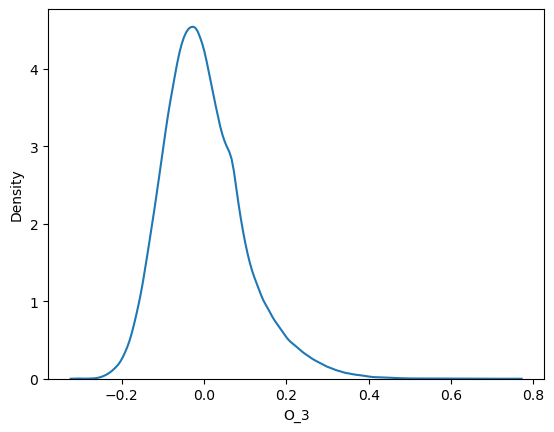

In [44]:
l_mse = mean_squared_error(y_test,y_predict)
l_rmse = np.sqrt(l_mse)
l_mae = mean_absolute_error(y_test,y_predict)
l_r2 = r2_score(y_test,y_predict)
l_explained_variance = explained_variance_score(y_test,y_predict)
print(pd.DataFrame({'MSE':l_mse,'RMSE':l_rmse,'MAE':l_mae,'R2':l_r2,'Explained Variance Score:':l_explained_variance},index=[' Linear Regression']))

residue=y_test-y_predict
residue.mean()
print(residue.mean()*100)
sns.kdeplot(x=residue)

### 2. Random Forest Regressor

In [48]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
y_predict2=model2.predict(x_test)

                               MSE      RMSE       MAE        R2  \
Random Forest Regressor   0.008569  0.092566  0.068556  0.481282   

                          Explained Variance Score:  
Random Forest Regressor                    0.481489  
-0.1850826108760148


<Axes: xlabel='O_3', ylabel='Density'>

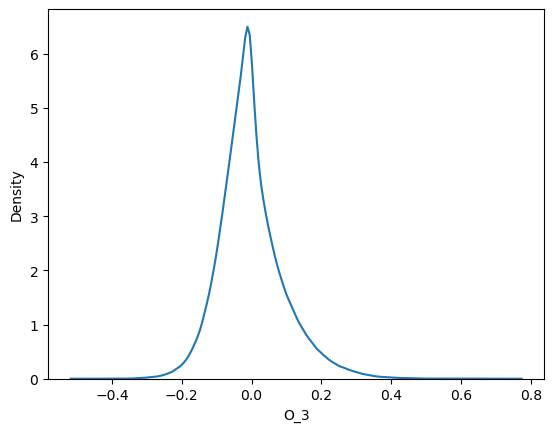

In [50]:
r_mse = mean_squared_error(y_test, y_predict2)
r_rmse = np.sqrt(r_mse)
r_mae = mean_absolute_error(y_test, y_predict2)
r_r2 = r2_score(y_test, y_predict2)
r_explained_variance = explained_variance_score(y_test, y_predict2)
print(pd.DataFrame({'MSE':r_mse,'RMSE':r_rmse,'MAE':r_mae,'R2':r_r2,'Explained Variance Score:':r_explained_variance},index=['Random Forest Regressor ']))
residue=y_test-y_predict2
print(residue.mean()*100)
sns.kdeplot(x=residue)


###3. GradientBoostingRegressor

In [51]:
model3= GradientBoostingRegressor()
model3.fit(x_train,y_train)

GradientBoostingRegressor()

In [52]:
y_predict3=model3.predict(x_test)

                                 MSE      RMSE       MAE        R2  \
GradientBoostingRegressor   0.008361  0.091438  0.067795  0.493852   

                            Explained Variance Score:  
GradientBoostingRegressor                    0.493854  
-0.020507213893169104


<Axes: xlabel='O_3', ylabel='Density'>

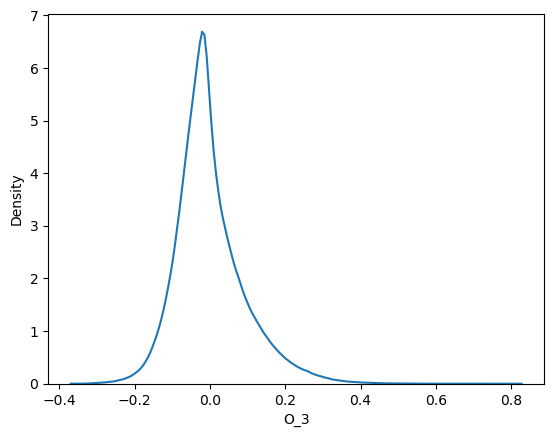

In [53]:
g_mse = mean_squared_error(y_test, y_predict3)
g_rmse = np.sqrt(g_mse)
g_mae = mean_absolute_error(y_test, y_predict3)
g_r2 = r2_score(y_test, y_predict3)
g_explained_variance = explained_variance_score(y_test, y_predict3)
print(pd.DataFrame({'MSE':g_mse,'RMSE':g_rmse,'MAE':g_mae,'R2':g_r2,'Explained Variance Score:':g_explained_variance},index=['GradientBoostingRegressor ']))
residue=y_test-y_predict3
print(residue.mean()*100)
sns.kdeplot(x=residue)

###4. DecisionTreeRegressor

In [54]:
from sklearn import tree
model4=tree.DecisionTreeRegressor()
model4.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
y_predict4=model4.predict(x_test)

                               MSE      RMSE       MAE        R2  \
Decision Tree Regressor   0.013985  0.118258  0.085497  0.153383   

                          Explained Variance Score:  
Decision Tree Regressor                    0.153626  
-0.20028681264348402


<Axes: xlabel='O_3', ylabel='Density'>

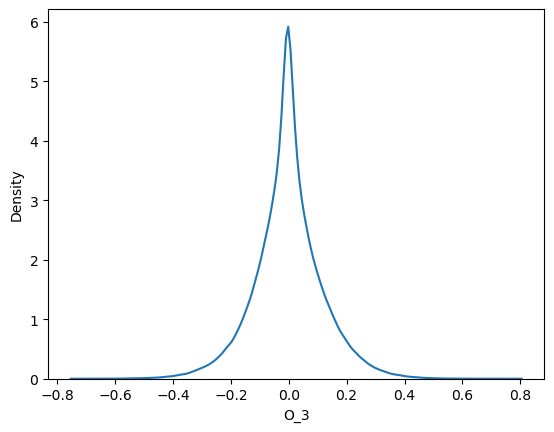

In [56]:
dt_mse = mean_squared_error(y_test, y_predict4)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, y_predict4)
dt_r2 = r2_score(y_test, y_predict4)
dt_explained_variance = explained_variance_score(y_test, y_predict4)
print(pd.DataFrame({'MSE':dt_mse,'RMSE':dt_rmse,'MAE':dt_mae,'R2':dt_r2,'Explained Variance Score:':dt_explained_variance},index=['Decision Tree Regressor ']))
residue=y_test-y_predict4
print(residue.mean()*100)
sns.kdeplot(x=residue)


###5. Ridge Regressor

In [57]:
model5=Ridge(alpha=0.1)
model5.fit(x_train,y_train)


Ridge(alpha=0.1)

In [58]:
y_predict5=model5.predict(x_test)

                      MSE      RMSE       MAE        R2  \
Ridge Regressor   0.00988  0.099399  0.076899  0.401882   

                  Explained Variance Score:  
Ridge Regressor                    0.401883  
-0.017828910030200342


<Axes: xlabel='O_3', ylabel='Density'>

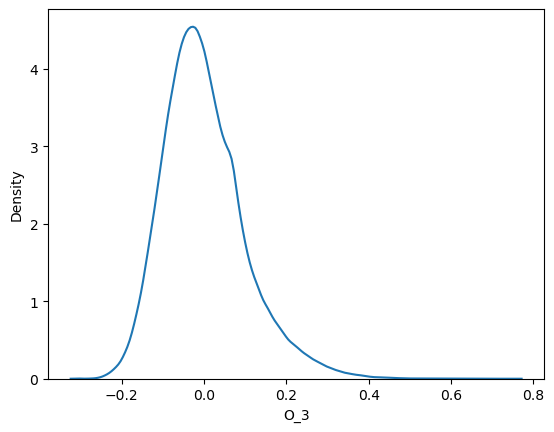

In [59]:
et_mse = mean_squared_error(y_test, y_predict5)
et_rmse = np.sqrt(et_mse)
et_mae = mean_absolute_error(y_test, y_predict5)
et_r2 = r2_score(y_test, y_predict5)
et_explained_variance = explained_variance_score(y_test, y_predict5)
print(pd.DataFrame({'MSE':et_mse,'RMSE':et_rmse,'MAE':et_mae,'R2':et_r2,'Explained Variance Score:':et_explained_variance},index=['Ridge Regressor ']))
residue=y_test-y_predict5
print(residue.mean()*100)
sns.kdeplot(x=residue)

#Performance Comparison

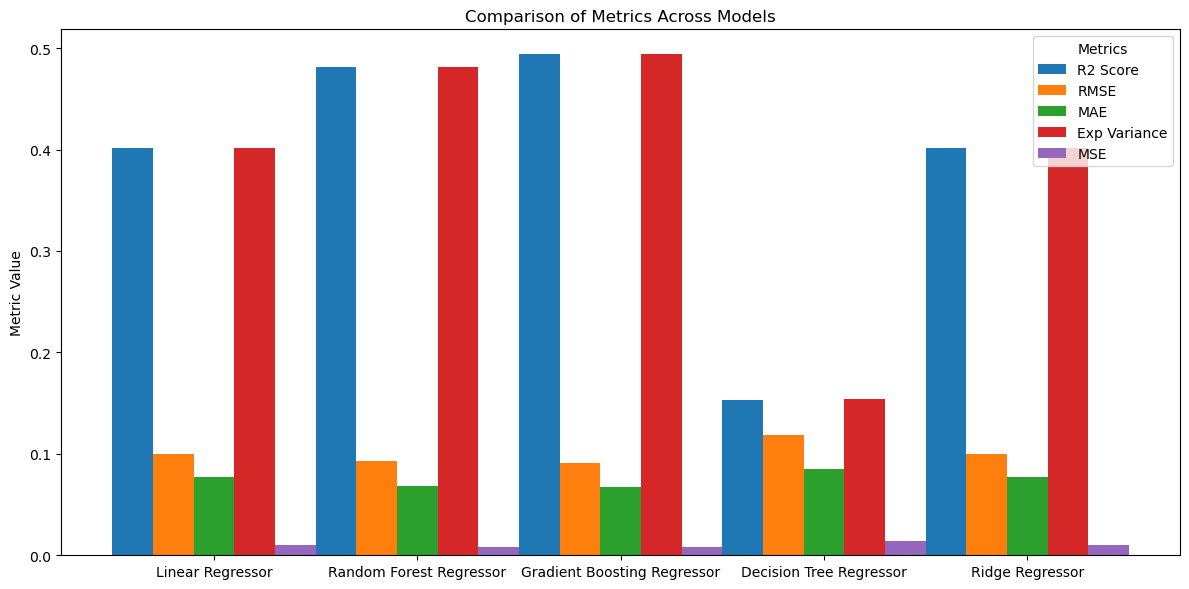

In [60]:
metrics = ["R2 Score", "RMSE", "MAE","Exp Variance",'MSE']
model_names = ["Linear Regressor", "Random Forest Regressor", "Gradient Boosting Regressor",'Decision Tree Regressor','Ridge Regressor']

# Example metric values (rows: metrics, columns: models)
metric_values = np.array([
    [l_r2, r_r2, g_r2,dt_r2,et_r2],
    [l_rmse, r_rmse, g_rmse,dt_rmse,et_rmse],
    [l_mae, r_mae, g_mae,dt_mae,et_mae],
    [l_explained_variance, r_explained_variance,g_explained_variance,dt_explained_variance,et_explained_variance],
    [l_mse, r_mse,g_mse,dt_mse,et_mse],

])

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(model_names))

bar_width = 0.2
for i, metric in enumerate(metrics):
    ax.bar(x + i * bar_width, metric_values[i], width=bar_width, label=metric)

ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
ax.set_xticklabels(model_names)
ax.set_ylabel("Metric Value")
ax.set_title("Comparison of Metrics Across Models")
ax.legend(title="Metrics")
plt.tight_layout()
plt.show()